In [1]:
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\DL379QB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Exploration

In [3]:
len = raw_data.shape[1]
print(f'There are {len} columns')

There are 75 columns


In [5]:
pd.set_option('display.max_columns', None) 
#raw_data.head()

In [6]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
raw_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
variable_data = raw_data.copy()

In [9]:
# Here we replace the strings in the 'emp_length' variable to make in more ML Friendly
variable_data['emp_length_int'] = variable_data['emp_length'].str.replace('\+ years', '')
variable_data['emp_length_int'] = variable_data['emp_length_int'].str.replace('< 1 year', str(0))
variable_data['emp_length_int'] = variable_data['emp_length_int'].str.replace('n/a',  str(0))
variable_data['emp_length_int'] = variable_data['emp_length_int'].str.replace(' years', '')
variable_data['emp_length_int'] = variable_data['emp_length_int'].str.replace(' year', '')

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_10948/3245962194.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  variable_data['emp_length_int'] = variable_data['emp_length'].str.replace('\+ years', '')


In [11]:
# The 'emp_length' variable is then turned into a numeric variable
variable_data['emp_length_int'] = pd.to_numeric(variable_data['emp_length_int'])

In [13]:
raw_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
# Removing strings from the 'term' variable
variable_data['term'] = variable_data['term'].str.replace(' months', '')
variable_data['term'] = variable_data['term'].str.replace(' months', '')

In [15]:
# Turning the 'term' varible into a numeric variable
variable_data['term'] = pd.to_numeric(variable_data['term'])

In [17]:
# Converting 'earliest_cr_line_date' to a date time variable
variable_data['earliest_cr_line_date'] = pd.to_datetime(variable_data['earliest_cr_line'], format = '%b-%y')

In [20]:
# Finding the days passed since '2017-12-01'
variable_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - variable_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [24]:
variable_data['mths_since_earliest_cr_line'][variable_data['mths_since_earliest_cr_line'] < 0] = variable_data['mths_since_earliest_cr_line'].max()

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_10948/2506739186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data['mths_since_earliest_cr_line'][variable_data['mths_since_earliest_cr_line'] < 0] = variable_data['mths_since_earliest_cr_line'].max()


In [27]:
variable_data['issue_d'] = pd.to_datetime(variable_data['issue_d'], format = '%b-%y')

In [30]:
# Finding the days passed since '2017-12-01'
variable_data['mths_since_earliest_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - variable_data['issue_d']) / np.timedelta64(1, 'M')))

### Preprocessing few discrete variables

In [33]:
loan_data_dummies = [pd.get_dummies(variable_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(variable_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(variable_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(variable_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(variable_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(variable_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(variable_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(variable_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [34]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [35]:
variable_data = pd.concat([variable_data, loan_data_dummies], axis = 1)

### Missing Variables

In [36]:
# Replace the missing values of 'total_rev_hi_lim' with the mean of the non-missing values of the variable.
variable_data['total_rev_hi_lim'].fillna(variable_data['funded_amnt'], inplace = True)

In [38]:
# Replace the missing values of 'annual_inc' with the mean of the non-missing values of the variable.
variable_data['annual_inc'].fillna(variable_data['annual_inc'].mean(), inplace=True)

In [39]:
# Replace the missing values for these variables with zeroes
variable_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
variable_data['acc_now_delinq'].fillna(0, inplace=True)
variable_data['total_acc'].fillna(0, inplace=True)
variable_data['pub_rec'].fillna(0, inplace=True)
variable_data['open_acc'].fillna(0, inplace=True)
variable_data['inq_last_6mths'].fillna(0, inplace=True)
variable_data['delinq_2yrs'].fillna(0, inplace=True)
variable_data['emp_length_int'].fillna(0, inplace=True)

### Defining the Dependent Variable

In [40]:
variable_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [41]:
variable_data['good_bad'] = np.where(variable_data['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off',
                                                                       'Default', 'Late (31-120 days)']), 0, 1)

## Splitting Data

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(variable_data.drop('good_bad', axis = 1), variable_data['good_bad'], test_size = 0.2, random_state = 0)


In [45]:
loan_data_inputs_train.shape

(373028, 205)

In [46]:
loan_data_inputs_test.shape

(93257, 205)

In [47]:
loan_data_targets_train.shape

(373028,)

In [48]:
loan_data_targets_test.shape

(93257,)

### Preprocessing Discrete Variables: Automating Calculaions

In [ ]:
# The Weight of Evidence measures the predictive power of an independent variable (feature) in relation to the dependent variable (target). It is used to 
#here to be able to make groupings within features so that dimensionality is reduced.

In [49]:
# Here we define the Weight of Evidence function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [164]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,639,0.740219,0.006852,473.0,166.0,0.005693,0.016323,-1.053338,NaN,NaN,0.292053
1,F,2568,0.750779,0.027537,1928.0,640.0,0.023205,0.062930,-0.997676,0.010560,0.055663,0.292053
2,E,7182,0.811612,0.077013,5829.0,1353.0,0.070155,0.133038,-0.639925,0.060834,0.357751,0.292053
3,D,15370,0.845413,0.164813,12994.0,2376.0,0.156390,0.233628,-0.401377,0.033801,0.238548,0.292053
4,C,25019,0.881970,0.268280,22066.0,2953.0,0.265577,0.290364,-0.089230,0.036557,0.312147,0.292053
5,B,27368,0.923487,0.293469,25274.0,2094.0,0.304187,0.205900,0.390254,0.041518,0.479484,0.292053
6,A,15111,0.961088,0.162036,14523.0,588.0,0.174793,0.057817,1.106316,0.037601,0.716062,0.292053


In [165]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

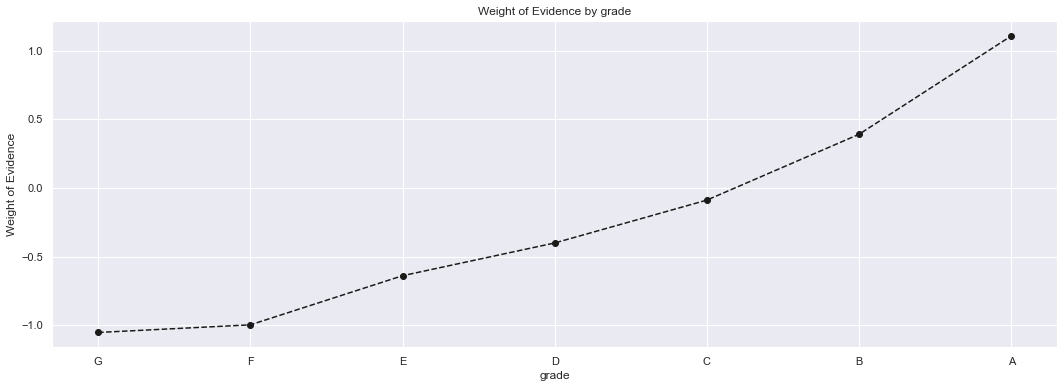

In [166]:
plot_by_woe(df_temp)

In [167]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,3,0.333333,0.000032,1.0,2.0,0.000012,0.000197,-2.793593,NaN,NaN,inf
1,AL,1198,0.866444,0.012846,1038.0,160.0,0.012493,0.015733,-0.230569,0.533111,2.563024,inf
2,FL,6360,0.869969,0.068199,5533.0,827.0,0.066593,0.081318,-0.199765,0.003524,0.030803,inf
3,NM,528,0.875000,0.005662,462.0,66.0,0.005560,0.006490,-0.154536,0.005031,0.045229,inf
4,HI,522,0.875479,0.005597,457.0,65.0,0.005500,0.006391,-0.150150,0.000479,0.004386,inf
5,MO,1497,0.878424,0.016052,1315.0,182.0,0.015827,0.017896,-0.122861,0.002945,0.027289,inf
6,NC,2499,0.881152,0.026797,2202.0,297.0,0.026502,0.029204,-0.097057,0.002729,0.025804,inf
7,WA,2045,0.881174,0.021929,1802.0,243.0,0.021688,0.023894,-0.096855,0.000021,0.000202,inf
8,MS,228,0.881579,0.002445,201.0,27.0,0.002419,0.002655,-0.092978,0.000405,0.003877,inf
9,LA,1077,0.883008,0.011549,951.0,126.0,0.011446,0.012389,-0.079214,0.001429,0.013764,inf


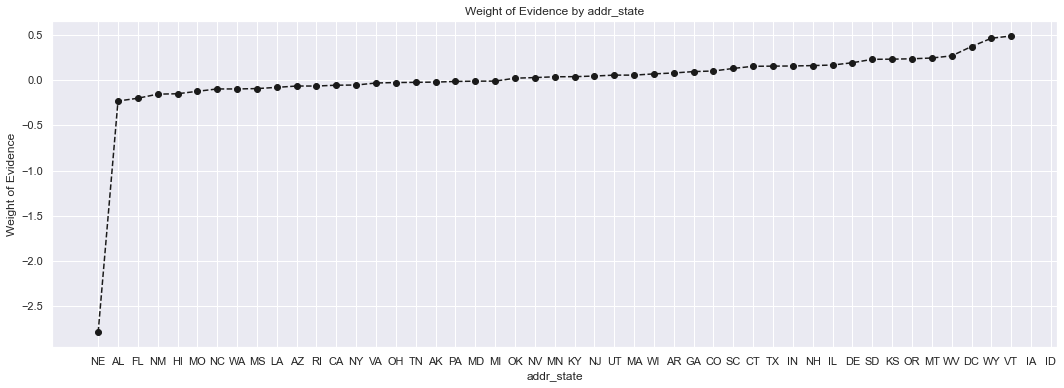

In [168]:
plot_by_woe(df_temp)

In [169]:
jj = df_inputs_prepr['addr_state'].unique()

In [170]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0 

In [171]:
# We create the following categories based on the plot:
# 'ND' 'NE' 'IA' NV' 'HI''FL'  'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

#### Home ownership variable

In [172]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,37555,0.875037,0.402704,32862.0,4693.0,0.395513,0.461455,-0.154201,NaN,NaN,0.019101
1,OTHER,41,0.878049,0.000440,36.0,5.0,0.000433,0.000492,-0.126365,0.003012,0.027836,0.019101
2,OWN,8312,0.891482,0.089130,7410.0,902.0,0.089184,0.088692,0.005525,0.013433,0.131890,0.019101
3,MORTGAGE,47336,0.903477,0.507587,42767.0,4569.0,0.514726,0.449263,0.136026,0.011995,0.130501,0.019101
4,NONE,13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.384461,0.019600,0.248434,0.019101


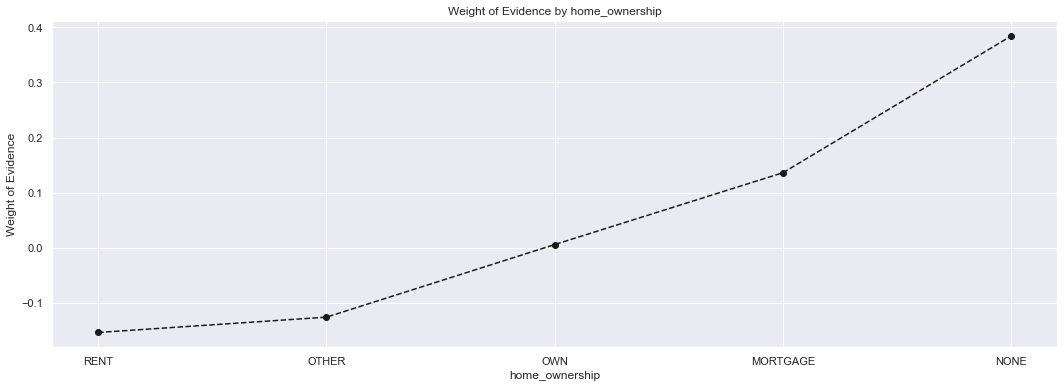

In [173]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [174]:

df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.



#### Verification_status variable

In [175]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33589,0.873887,0.360177,29353.0,4236.0,0.353280,0.416519,-0.164671,NaN,NaN,0.018685
1,Source Verified,29864,0.895761,0.320233,26751.0,3113.0,0.321964,0.306096,0.050539,0.021873,0.215210,0.018685
2,Not Verified,29804,0.905348,0.319590,26983.0,2821.0,0.324756,0.277384,0.157670,0.009587,0.107131,0.018685


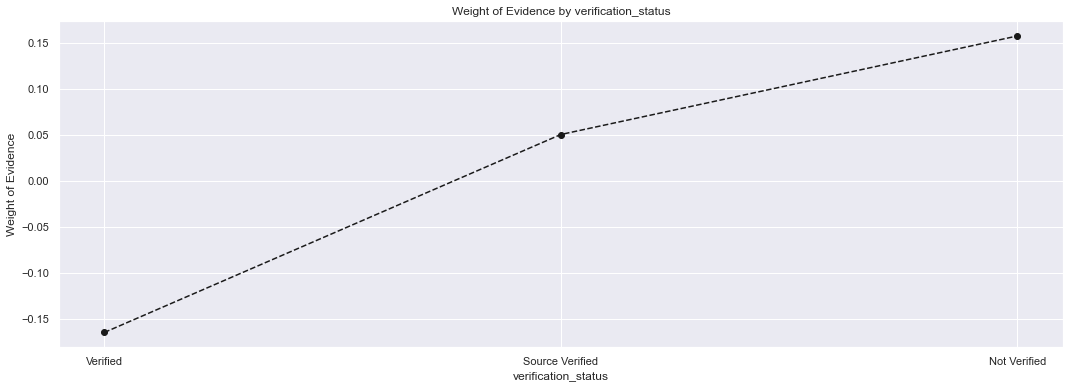

In [176]:
plot_by_woe(df_temp)

#### purpose variable

In [179]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,1462,0.790014,0.015677,1155.0,307.0,0.013901,0.030187,-0.775438,NaN,NaN,0.034465
1,educational,93,0.806452,0.000997,75.0,18.0,0.000903,0.001770,-0.673330,0.016438,0.102108,0.034465
2,renewable_energy,57,0.824561,0.000611,47.0,10.0,0.000566,0.000983,-0.552884,0.018110,0.120446,0.034465
3,house,463,0.833693,0.004965,386.0,77.0,0.004646,0.007571,-0.488414,0.009132,0.064469,0.034465
4,medical,915,0.864481,0.009812,791.0,124.0,0.009520,0.012193,-0.247430,0.030788,0.240984,0.034465
5,other,4662,0.868297,0.049991,4048.0,614.0,0.048720,0.060374,-0.214463,0.003816,0.032967,0.034465
6,wedding,492,0.880081,0.005276,433.0,59.0,0.005211,0.005801,-0.107246,0.011784,0.107217,0.034465
7,debt_consolidation,55129,0.886140,0.591151,48852.0,6277.0,0.587962,0.617207,-0.048543,0.006058,0.058703,0.034465
8,vacation,480,0.889583,0.005147,427.0,53.0,0.005139,0.005211,-0.013954,0.003444,0.034589,0.034465
9,moving,596,0.892617,0.006391,532.0,64.0,0.006403,0.006293,0.017314,0.003034,0.031268,0.034465


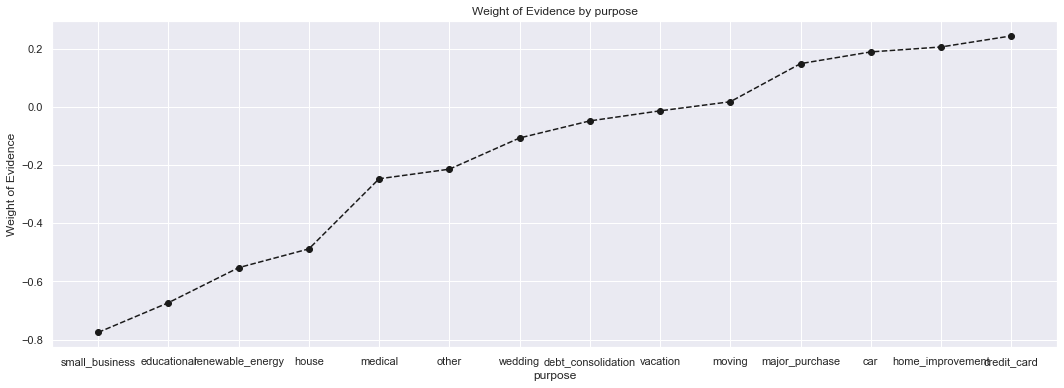

In [180]:
plot_by_woe(df_temp)

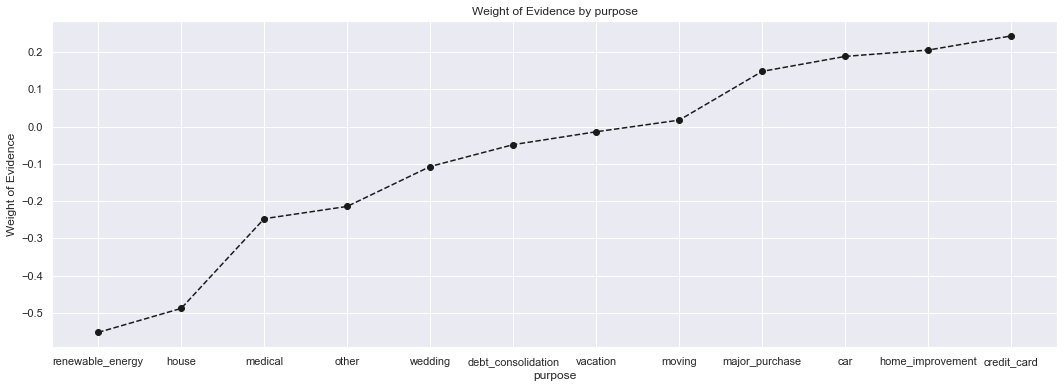

In [181]:
plot_by_woe(df_temp.iloc[2: , :])

In [183]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

#### initial_list_status variable

In [185]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60620,0.879429,0.650032,53311.0,7309.0,0.641629,0.718682,-0.113410,NaN,NaN,0.027392
1,w,32637,0.912339,0.349968,29776.0,2861.0,0.358371,0.281318,0.242085,0.03291,0.355495,0.027392


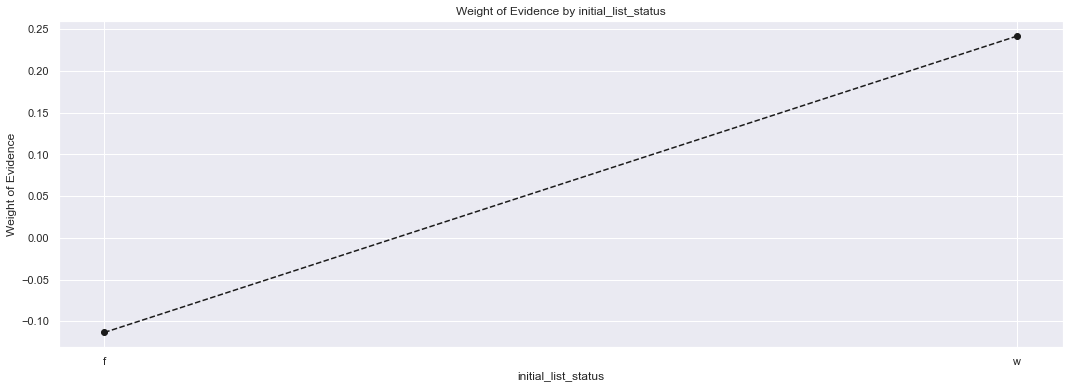

In [186]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [187]:
# Here we define the Weight of Evidence function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [189]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67698,0.903394,0.725929,61158.0,6540.0,0.736072,0.643068,0.135077,NaN,NaN,0.040638
1,60,25559,0.857976,0.274071,21929.0,3630.0,0.263928,0.356932,-0.301869,0.045419,0.436946,0.040638


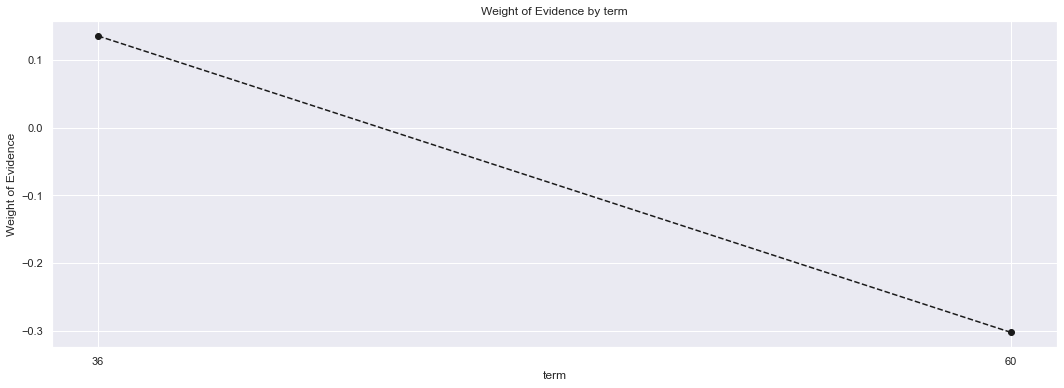

In [190]:
plot_by_woe(df_temp)

In [191]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term'] == 60), 1, 0)

In [193]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11311,0.875254,0.121288,9900.0,1411.0,0.119152,0.138741,-0.152210,NaN,NaN,0.007336
1,1.0,5906,0.887064,0.063330,5239.0,667.0,0.063054,0.065585,-0.039350,0.011810,0.112860,0.007336
2,2.0,8270,0.892624,0.088680,7382.0,888.0,0.088847,0.087316,0.017382,0.005560,0.056732,0.007336
3,3.0,7480,0.889840,0.080208,6656.0,824.0,0.080109,0.081023,-0.011343,0.002784,0.028725,0.007336
4,4.0,5572,0.886755,0.059749,4941.0,631.0,0.059468,0.062045,-0.042429,0.003084,0.031086,0.007336
5,5.0,6070,0.886985,0.065089,5384.0,686.0,0.064800,0.067453,-0.040137,0.000230,0.002292,0.007336
6,6.0,5271,0.884083,0.056521,4660.0,611.0,0.056086,0.060079,-0.068772,0.002902,0.028635,0.007336
7,7.0,5314,0.885585,0.056982,4706.0,608.0,0.056639,0.059784,-0.054027,0.001503,0.014745,0.007336
8,8.0,4469,0.890132,0.047921,3978.0,491.0,0.047878,0.048279,-0.008356,0.004547,0.045672,0.007336
9,9.0,3621,0.894504,0.038828,3239.0,382.0,0.038983,0.037561,0.037153,0.004372,0.045509,0.007336


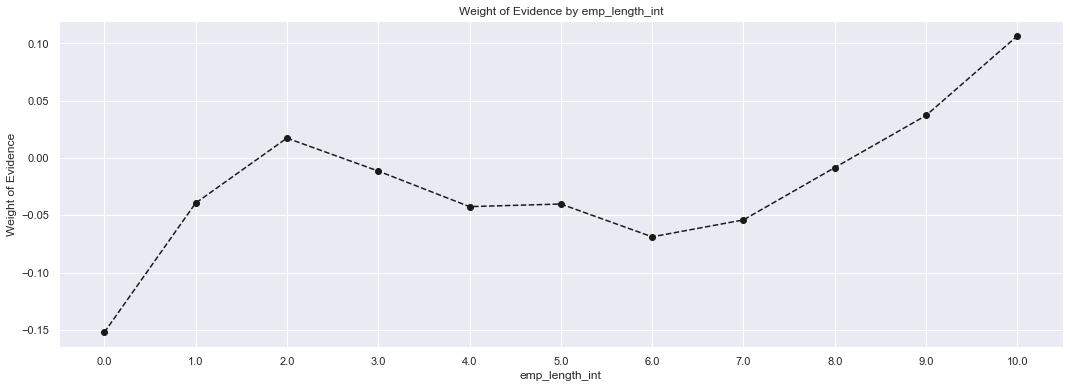

In [194]:
plot_by_woe(df_temp)

In [195]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [198]:
df_inputs_prepr['mths_since_earlist_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_issue_d'], 50)

In [200]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earlist_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_earlist_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7098,0.941533,0.076112,6683.0,415.0,0.080434,0.040806,0.678598,NaN,NaN,0.111019
1,"(37.8, 39.6]",9736,0.929540,0.104400,9050.0,686.0,0.108922,0.067453,0.479196,0.011993,0.199401,0.111019
2,"(39.6, 41.4]",9735,0.917514,0.104389,8932.0,803.0,0.107502,0.078958,0.308595,0.012026,0.170602,0.111019
3,"(41.4, 43.2]",7281,0.901937,0.078075,6567.0,714.0,0.079038,0.070206,0.118483,0.015578,0.190111,0.111019
4,"(43.2, 45.0]",7064,0.902180,0.075748,6373.0,691.0,0.076703,0.067945,0.121240,0.000244,0.002756,0.111019
5,"(45.0, 46.8]",2996,0.895527,0.032126,2683.0,313.0,0.032291,0.030777,0.048042,0.006653,0.073198,0.111019
6,"(46.8, 48.6]",6215,0.896380,0.066644,5571.0,644.0,0.067050,0.063324,0.057185,0.000852,0.009143,0.111019
7,"(48.6, 50.4]",5799,0.891878,0.062183,5172.0,627.0,0.062248,0.061652,0.009622,0.004502,0.047563,0.111019
8,"(50.4, 52.2]",5105,0.877963,0.054741,4482.0,623.0,0.053943,0.061259,-0.127168,0.013915,0.136790,0.111019
9,"(52.2, 54.0]",4483,0.876422,0.048071,3929.0,554.0,0.047288,0.054474,-0.141471,0.001541,0.014303,0.111019


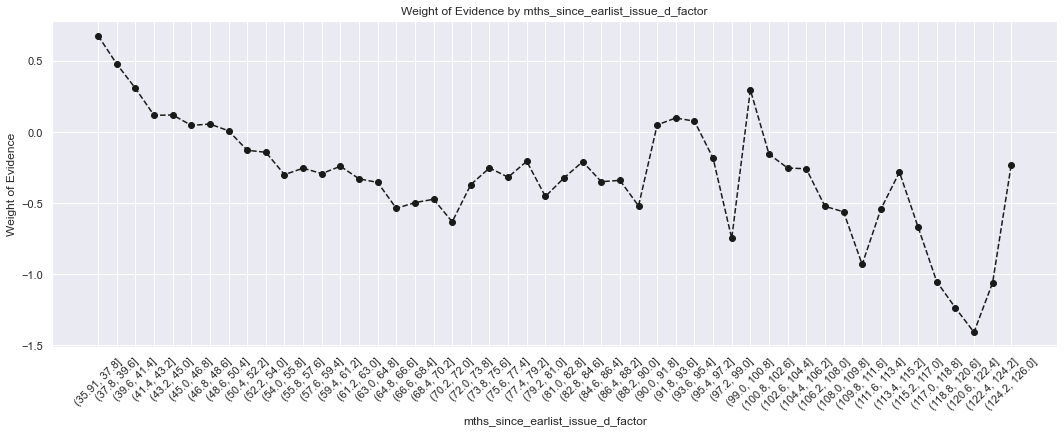

In [201]:
plot_by_woe(df_temp, 45)

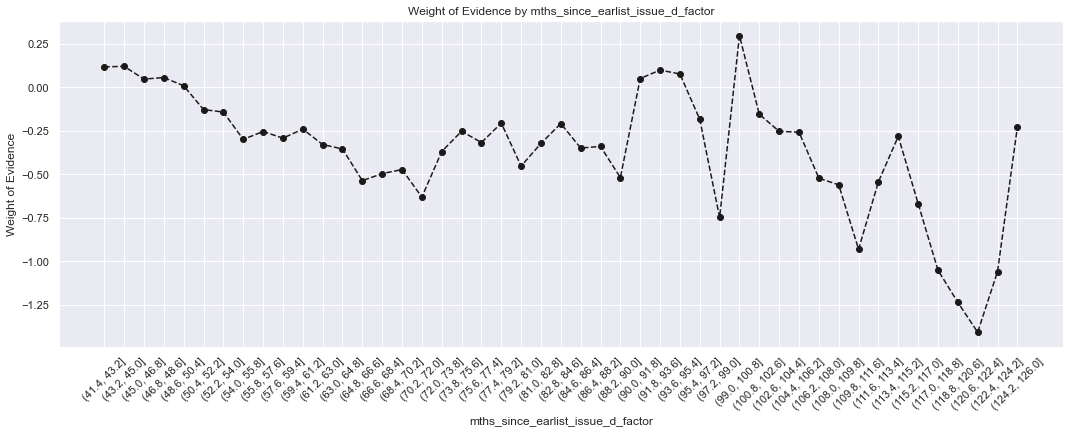

In [202]:
plot_by_woe(df_temp.iloc[3: , :], 45)

In [203]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_earliest_issue_d:<38']   = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_earliest_issue_d:>84']   = np.where(df_inputs_prepr['mths_since_earliest_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_earliest_issue_d'].max()))), 1, 0)

In [204]:
df_inputs_prepr['int_rate_factor'] = pd.cut (df_inputs_prepr['int_rate'], 50)

In [205]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",182,0.956044,0.001952,174.0,8.0,0.002094,0.000787,0.979168,NaN,NaN,0.34684
1,"(5.833, 6.246]",2080,0.978365,0.022304,2035.0,45.0,0.024492,0.004425,1.711143,0.022321,0.731975,0.34684
2,"(6.246, 6.658]",2005,0.971072,0.021500,1947.0,58.0,0.023433,0.005703,1.413156,0.007293,0.297987,0.34684
3,"(6.658, 7.071]",455,0.962637,0.004879,438.0,17.0,0.005272,0.001672,1.148560,0.008435,0.264596,0.34684
4,"(7.071, 7.484]",827,0.978235,0.008868,809.0,18.0,0.009737,0.001770,1.704981,0.015597,0.556422,0.34684
5,"(7.484, 7.897]",3244,0.964242,0.034786,3128.0,116.0,0.037647,0.011406,1.194113,0.013993,0.510868,0.34684
6,"(7.897, 8.31]",2341,0.951730,0.025103,2228.0,113.0,0.026815,0.011111,0.881026,0.012512,0.313087,0.34684
7,"(8.31, 8.722]",1673,0.968320,0.017940,1620.0,53.0,0.019498,0.005211,1.319443,0.016590,0.438418,0.34684
8,"(8.722, 9.135]",2452,0.934339,0.026293,2291.0,161.0,0.027574,0.015831,0.554893,0.033981,0.764550,0.34684
9,"(9.135, 9.548]",1666,0.957983,0.017865,1596.0,70.0,0.019209,0.006883,1.026314,0.023644,0.471421,0.34684


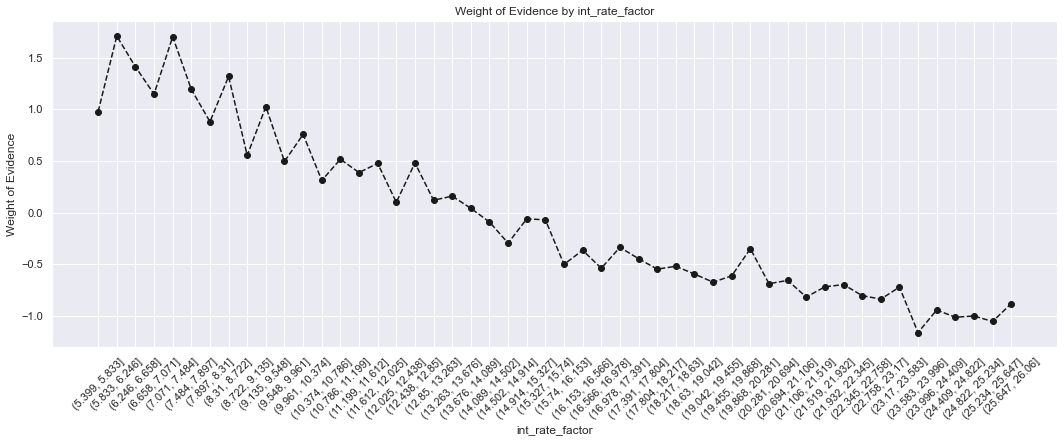

In [206]:
plot_by_woe(df_temp, 45)

In [207]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [208]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(565.6, 1288.0]",446,0.926009,0.004782,413.0,33.0,0.004971,0.003245,0.426494,NaN,NaN,0.020482
1,"(1288.0, 1976.0]",655,0.903817,0.007024,592.0,63.0,0.007125,0.006195,0.139926,0.022192,0.286568,0.020482
2,"(1976.0, 2664.0]",1521,0.906640,0.016310,1379.0,142.0,0.016597,0.013963,0.172841,0.002824,0.032915,0.020482
3,"(2664.0, 3352.0]",1754,0.896237,0.018808,1572.0,182.0,0.018920,0.017896,0.055651,0.010403,0.117190,0.020482
4,"(3352.0, 4040.0]",2360,0.896186,0.025306,2115.0,245.0,0.025455,0.024090,0.055106,0.000051,0.000545,0.020482
5,"(4040.0, 4728.0]",1059,0.881964,0.011356,934.0,125.0,0.011241,0.012291,-0.089283,0.014222,0.144389,0.020482
6,"(4728.0, 5416.0]",4116,0.893829,0.044136,3679.0,437.0,0.044279,0.042970,0.030017,0.011865,0.119300,0.020482
7,"(5416.0, 6104.0]",4100,0.903171,0.043965,3703.0,397.0,0.044568,0.039036,0.132516,0.009342,0.102499,0.020482
8,"(6104.0, 6792.0]",1662,0.899519,0.017822,1495.0,167.0,0.017993,0.016421,0.091442,0.003652,0.041075,0.020482
9,"(6792.0, 7480.0]",2931,0.900034,0.031429,2638.0,293.0,0.031750,0.028810,0.097158,0.000515,0.005716,0.020482


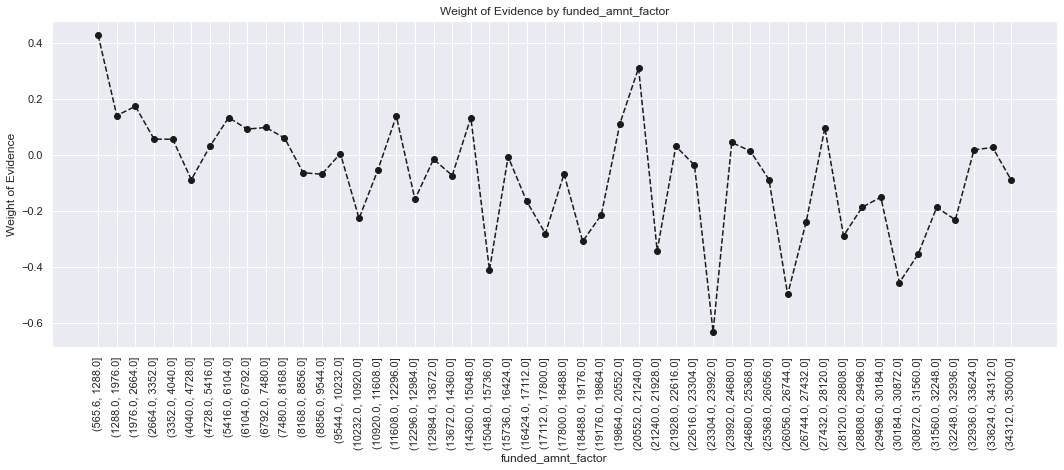

In [209]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data preparation. Preprocessing continuous variables: creating dummies.

In [211]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

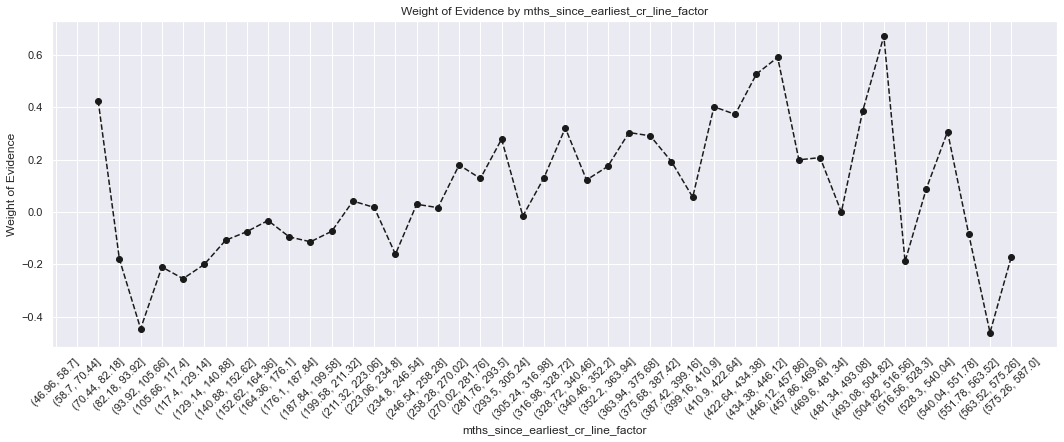

In [212]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
plot_by_woe(df_temp, 45)

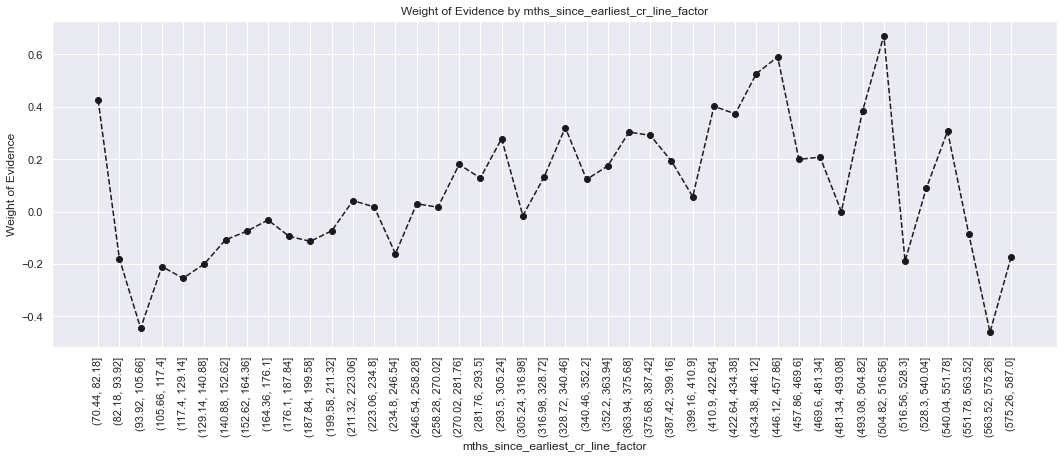

In [213]:
plot_by_woe(df_temp.iloc[6:, :], 90)

In [214]:
# We create the following categories based on the plot:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140']    = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352']    = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [216]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

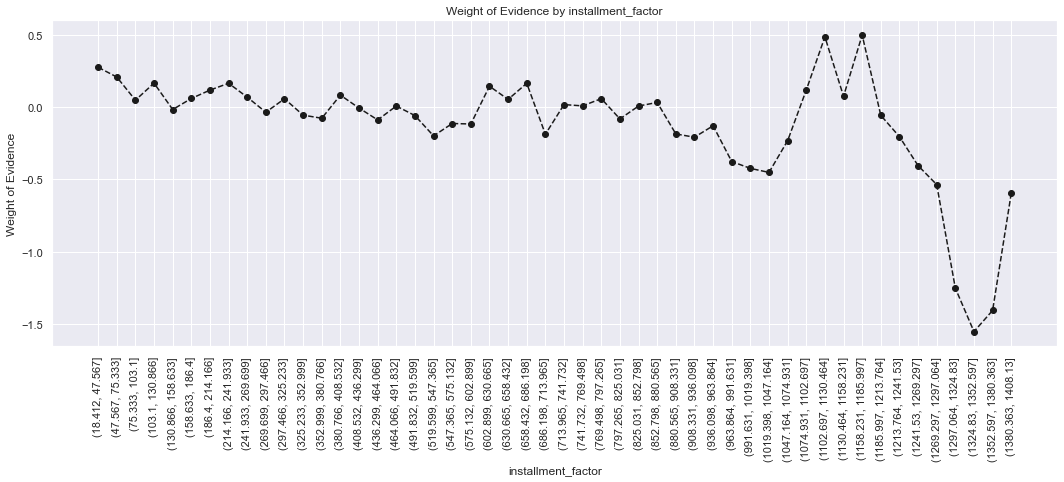

In [217]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
plot_by_woe(df_temp, 90)

In [218]:
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(18.412, 47.567]",542,0.915129,0.005812,496.0,46.0,0.005970,0.004523,0.277488,NaN,NaN,0.017659
1,"(47.567, 75.333]",1274,0.909733,0.013661,1159.0,115.0,0.013949,0.011308,0.209935,0.005396,0.067554,0.017659
2,"(75.333, 103.1]",1869,0.895666,0.020041,1674.0,195.0,0.020148,0.019174,0.049526,0.014067,0.160409,0.017659
3,"(103.1, 130.866]",2196,0.906193,0.023548,1990.0,206.0,0.023951,0.020256,0.167568,0.010527,0.118042,0.017659
4,"(130.866, 158.633]",2696,0.889466,0.028909,2398.0,298.0,0.028861,0.029302,-0.015149,0.016727,0.182717,0.017659
5,"(158.633, 186.4]",4097,0.896754,0.043932,3674.0,423.0,0.044219,0.041593,0.061218,0.007288,0.076367,0.017659
6,"(186.4, 214.166]",4184,0.902008,0.044865,3774.0,410.0,0.045422,0.040315,0.119288,0.005254,0.058069,0.017659
7,"(214.166, 241.933]",3877,0.906113,0.041573,3513.0,364.0,0.042281,0.035792,0.166626,0.004105,0.047338,0.017659
8,"(241.933, 269.699]",4834,0.897600,0.051835,4339.0,495.0,0.052222,0.048673,0.070395,0.008513,0.096230,0.017659
9,"(269.699, 297.466]",4902,0.887597,0.052564,4351.0,551.0,0.052367,0.054179,-0.034020,0.010003,0.104415,0.017659


In [220]:
df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 50)

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


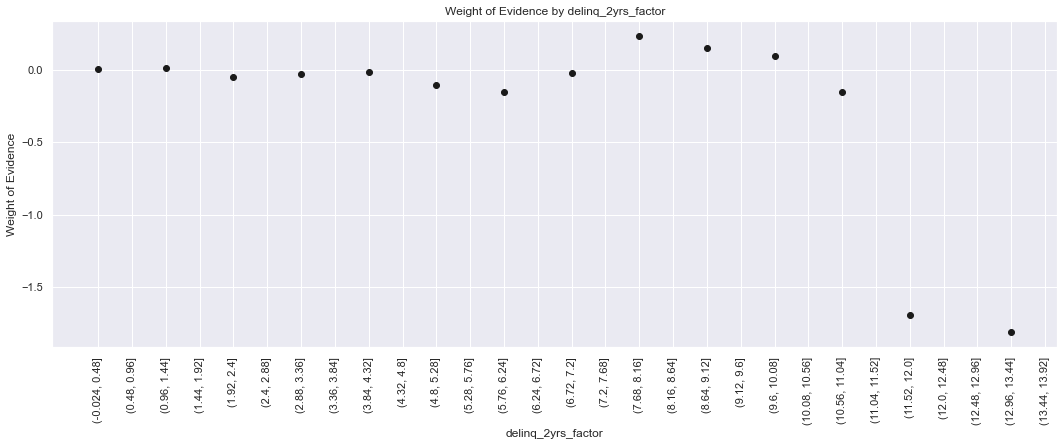

In [221]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs_factor', df_targets_prepr)
plot_by_woe(df_temp, 90)

In [222]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [224]:
df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 50)

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


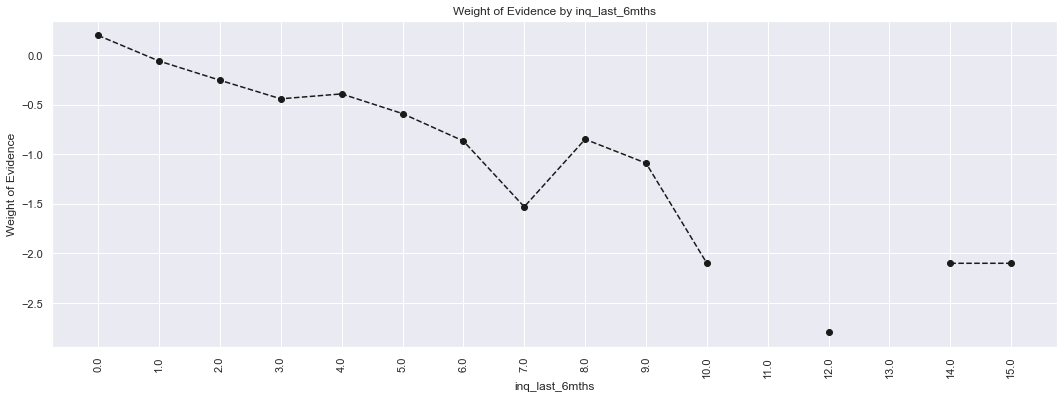

In [225]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
plot_by_woe(df_temp, 90)

In [226]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0']   = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
    df_inputs_prepr['inq_last_6mths:>6']  = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [228]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)

In [229]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)
df_temp

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.076, 1.52]",41,0.804878,0.000440,33.0,8.0,0.000397,0.000787,-0.683380,NaN,NaN,inf
1,"(1.52, 3.04]",1431,0.879804,0.015345,1259.0,172.0,0.015153,0.016912,-0.109867,0.074926,0.573513,inf
2,"(3.04, 4.56]",2506,0.899441,0.026872,2254.0,252.0,0.027128,0.024779,0.090587,0.019637,0.200454,inf
3,"(4.56, 6.08]",10515,0.886638,0.112753,9323.0,1192.0,0.112208,0.117207,-0.043594,0.012803,0.134181,inf
4,"(6.08, 7.6]",7676,0.885878,0.082310,6800.0,876.0,0.081842,0.086136,-0.051134,0.000760,0.007540,inf
5,"(7.6, 9.12]",17034,0.888458,0.182657,15134.0,1900.0,0.182146,0.186824,-0.025356,0.002580,0.025778,inf
6,"(9.12, 10.64]",8371,0.894875,0.089763,7491.0,880.0,0.090159,0.086529,0.041090,0.006417,0.066446,inf
7,"(10.64, 12.16]",14780,0.892422,0.158487,13190.0,1590.0,0.158749,0.156342,0.015279,0.002453,0.025811,inf
8,"(12.16, 13.68]",5974,0.892702,0.064060,5333.0,641.0,0.064186,0.063029,0.018194,0.000280,0.002915,inf
9,"(13.68, 15.2]",9011,0.891577,0.096625,8034.0,977.0,0.096694,0.096067,0.006505,0.001125,0.011689,inf


In [230]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [232]:
df_inputs_prepr['pub_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 50)

In [233]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_factor', df_targets_prepr)
df_temp

,pub_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.034, 0.68]",80965,0.889656,0.868192,72031.0,8934.0,0.866935,0.878466,-0.013214,NaN,NaN,inf
1,"(0.68, 1.36]",10598,0.897528,0.113643,9512.0,1086.0,0.114482,0.106785,0.069607,0.007872,0.082821,inf
2,"(1.36, 2.04]",1127,0.905945,0.012085,1021.0,106.0,0.012288,0.010423,0.164653,0.008417,0.095046,inf
3,"(2.04, 2.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(2.72, 3.4]",354,0.926554,0.003796,328.0,26.0,0.003948,0.002557,0.434471,NaN,NaN,inf
5,"(3.4, 4.08]",100,0.890000,0.001072,89.0,11.0,0.001071,0.001082,-0.009705,0.036554,0.444176,inf
6,"(4.08, 4.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(4.76, 5.44]",56,0.964286,0.000600,54.0,2.0,0.000650,0.000197,1.195391,NaN,NaN,inf
8,"(5.44, 6.12]",27,0.851852,0.000290,23.0,4.0,0.000277,0.000393,-0.351246,0.112434,1.546637,inf
9,"(6.12, 6.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


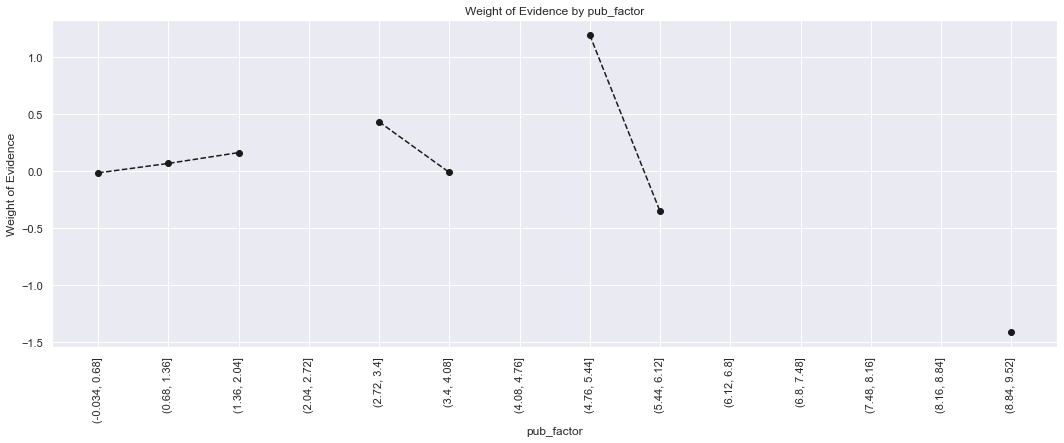

In [234]:
plot_by_woe(df_temp, 90)

In [235]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [237]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [238]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.102, 2.04]",24,0.833333,0.000257,20.0,4.0,0.000241,0.000393,-0.491008,NaN,NaN,inf
1,"(2.04, 4.08]",347,0.864553,0.003721,300.0,47.0,0.003611,0.004621,-0.246811,0.031220,0.244197,inf
2,"(4.08, 6.12]",1189,0.861228,0.012750,1024.0,165.0,0.012324,0.016224,-0.274920,0.003325,0.028109,inf
3,"(6.12, 8.16]",2286,0.867892,0.024513,1984.0,302.0,0.023879,0.029695,-0.218003,0.006664,0.056917,inf
4,"(8.16, 10.2]",3298,0.872044,0.035365,2876.0,422.0,0.034614,0.041495,-0.181296,0.004152,0.036707,inf
5,"(10.2, 12.24]",4431,0.883322,0.047514,3914.0,517.0,0.047107,0.050836,-0.076174,0.011278,0.105122,inf
6,"(12.24, 14.28]",5413,0.880288,0.058044,4765.0,648.0,0.057350,0.063717,-0.105284,0.003034,0.029110,inf
7,"(14.28, 16.32]",6200,0.887097,0.066483,5500.0,700.0,0.066196,0.068830,-0.039023,0.006809,0.066261,inf
8,"(16.32, 18.36]",6585,0.888535,0.070611,5851.0,734.0,0.070420,0.072173,-0.024587,0.001438,0.014436,inf
9,"(18.36, 20.4]",6770,0.882127,0.072595,5972.0,798.0,0.071876,0.078466,-0.087717,0.006408,0.063130,inf


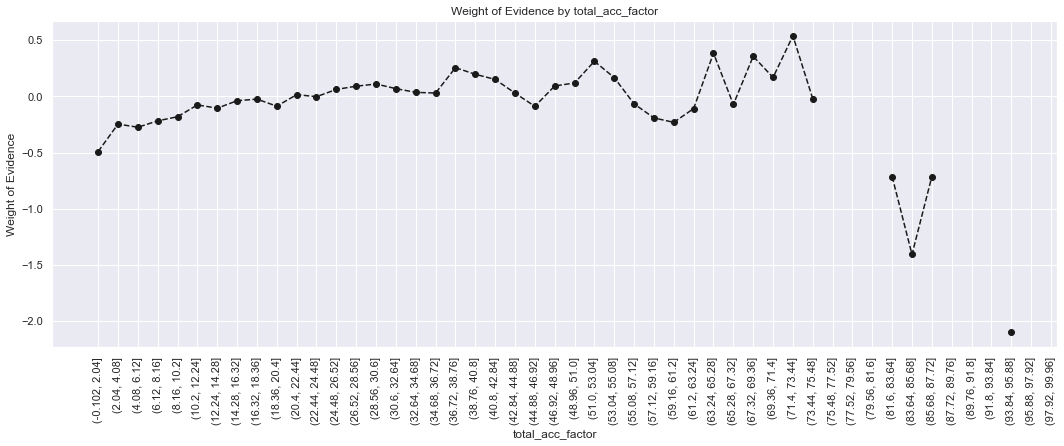

In [239]:
plot_by_woe(df_temp, 90)

In [240]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [242]:
df_inputs_prepr['acc_now_delinq_factor'] = pd.cut(df_inputs_prepr['acc_now_delinq'], 50)

In [243]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq_factor', df_targets_prepr)
df_temp

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,acc_now_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.005, 0.1]",92930,0.890982,0.996494,82799.0,10131.0,0.996534,0.996165,0.000370,NaN,NaN,inf
1,"(0.1, 0.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(0.2, 0.3]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(0.3, 0.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(0.4, 0.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(0.5, 0.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(0.6, 0.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(0.7, 0.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(0.8, 0.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(0.9, 1.0]",306,0.882353,0.003281,270.0,36.0,0.003250,0.003540,-0.085543,NaN,NaN,inf


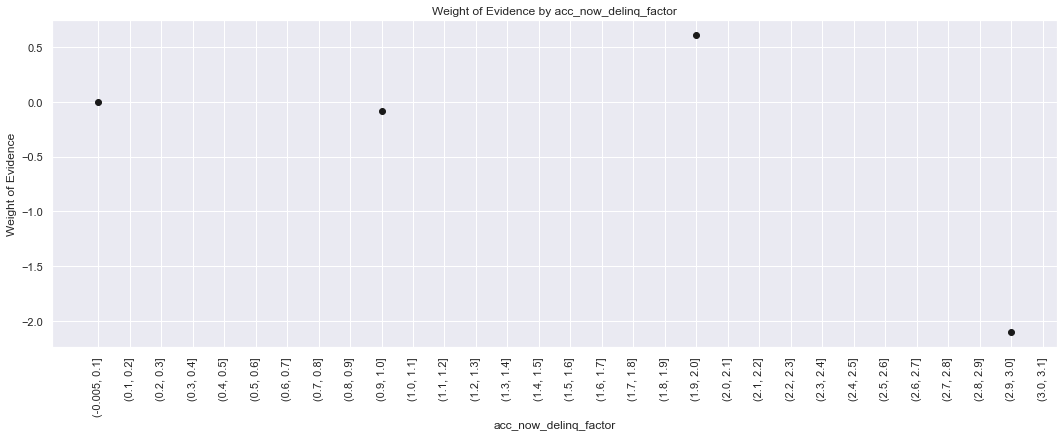

In [244]:
plot_by_woe(df_temp, 90)

In [245]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [247]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",4742,0.867356,0.050849,4113.0,629.0,0.049502,0.061849,-0.222669,NaN,NaN,inf
1,"(5000.0, 9999.999]",13436,0.879801,0.144075,11821.0,1615.0,0.142273,0.158800,-0.109903,0.012445,0.112766,inf
2,"(9999.999, 14999.998]",14822,0.875320,0.158937,12974.0,1848.0,0.156150,0.181711,-0.151603,0.004480,0.041699,inf
3,"(14999.998, 19999.998]",12832,0.879676,0.137598,11288.0,1544.0,0.135858,0.151819,-0.111082,0.004355,0.040520,inf
4,"(19999.998, 24999.997]",10403,0.888686,0.111552,9245.0,1158.0,0.111269,0.113864,-0.023058,0.009010,0.088025,inf
5,"(24999.997, 29999.997]",8080,0.888985,0.086642,7183.0,897.0,0.086452,0.088201,-0.020030,0.000299,0.003028,inf
6,"(29999.997, 34999.996]",5993,0.901051,0.064263,5400.0,593.0,0.064992,0.058309,0.108514,0.012066,0.128543,inf
7,"(34999.996, 39999.996]",4974,0.904704,0.053336,4500.0,474.0,0.054160,0.046608,0.150179,0.003653,0.041666,inf
8,"(39999.996, 44999.996]",3731,0.906727,0.040008,3383.0,348.0,0.040716,0.034218,0.173870,0.002023,0.023690,inf
9,"(44999.996, 49999.995]",2883,0.915366,0.030915,2639.0,244.0,0.031762,0.023992,0.280541,0.008639,0.106671,inf


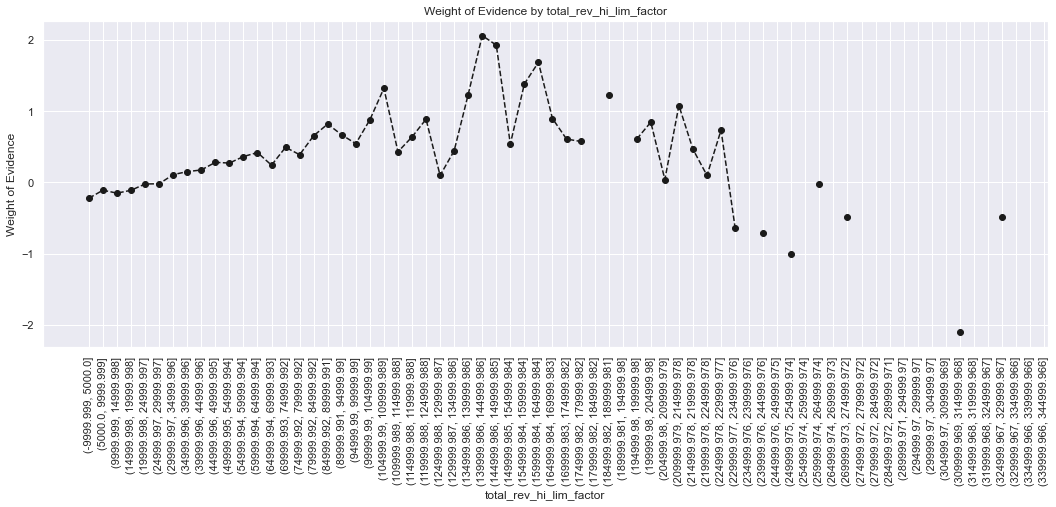

In [248]:
plot_by_woe(df_temp, 90)

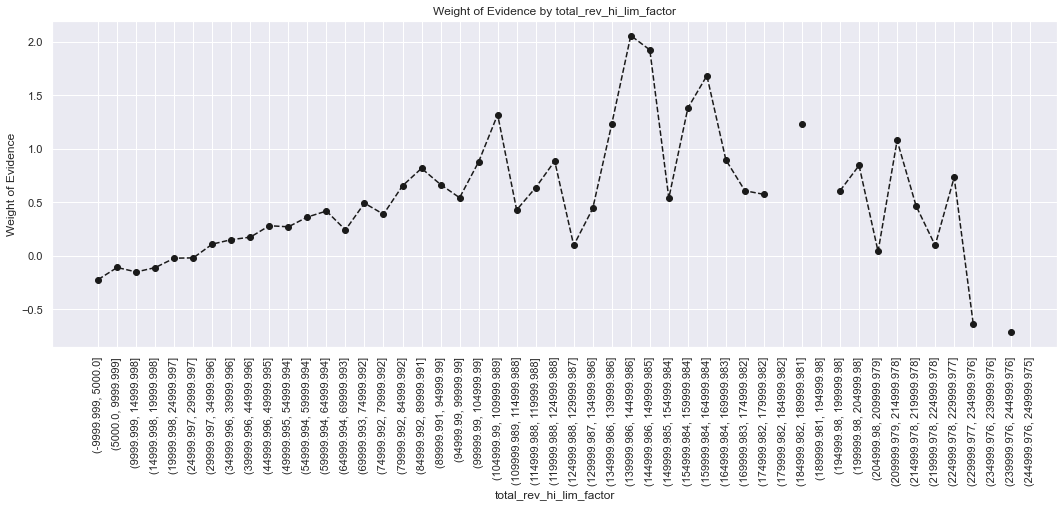

In [249]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [250]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K']    = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K']  = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K']    = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [252]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100) 

In [253]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\DL379QB\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-795.8, 54158.0]",35470,0.867860,0.380347,30783.0,4687.0,0.370491,0.460865,-0.218276,NaN,NaN,inf
1,"(54158.0, 104116.0]",43330,0.899885,0.464630,38992.0,4338.0,0.469291,0.426549,0.095497,0.032024,0.313773,inf
2,"(104116.0, 154074.0]",10451,0.918955,0.112067,9604.0,847.0,0.115590,0.083284,0.327788,0.019071,0.232291,inf
3,"(154074.0, 204032.0]",2503,0.918498,0.026840,2299.0,204.0,0.027670,0.020059,0.321663,0.000457,0.006125,inf
4,"(204032.0, 253990.0]",766,0.933420,0.008214,715.0,51.0,0.008605,0.005015,0.540011,0.014923,0.218347,inf
5,"(253990.0, 303948.0]",355,0.929577,0.003807,330.0,25.0,0.003972,0.002458,0.479771,0.003843,0.060240,inf
6,"(303948.0, 353906.0]",131,0.954198,0.001405,125.0,6.0,0.001504,0.000590,0.936108,0.024621,0.456337,inf
7,"(353906.0, 403864.0]",86,0.941860,0.000922,81.0,5.0,0.000975,0.000492,0.684565,0.012338,0.251543,inf
8,"(403864.0, 453822.0]",45,0.955556,0.000483,43.0,2.0,0.000518,0.000197,0.967607,0.013695,0.283042,inf
9,"(453822.0, 503780.0]",35,0.971429,0.000375,34.0,1.0,0.000409,0.000098,1.425914,0.015873,0.458308,inf


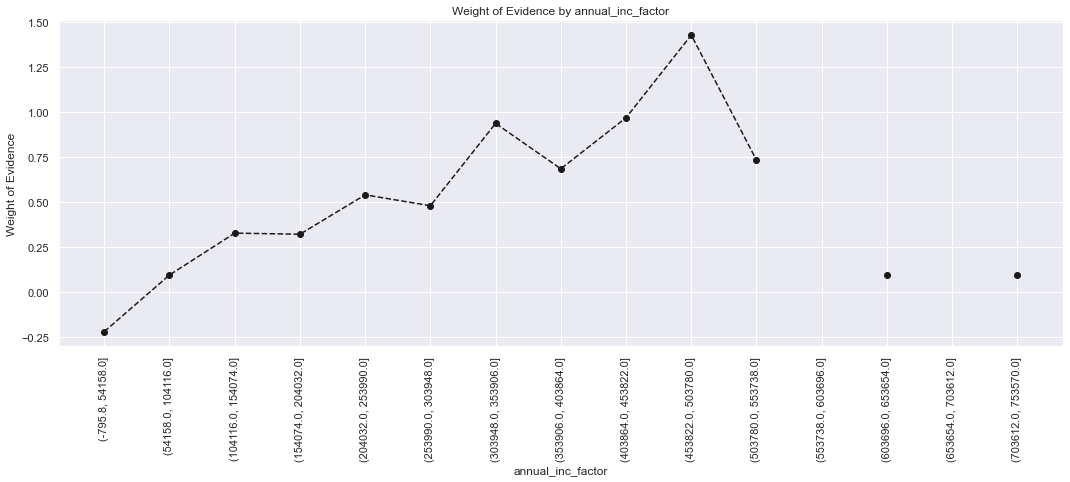

In [254]:
plot_by_woe(df_temp, 90)

In [256]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-795.8, 104116.0]",78800,0.885470,0.844977,69775.0,9025.0,0.839782,0.887414,-0.055169,NaN,NaN,inf
1,"(104116.0, 204032.0]",12954,0.918867,0.138906,11903.0,1051.0,0.143259,0.103343,0.326602,0.033397,0.381771,inf
2,"(204032.0, 303948.0]",1121,0.932203,0.012021,1045.0,76.0,0.012577,0.007473,0.520593,0.013337,0.193990,inf
3,"(303948.0, 403864.0]",217,0.949309,0.002327,206.0,11.0,0.002479,0.001082,0.829535,0.017105,0.308942,inf
4,"(403864.0, 503780.0]",80,0.962500,0.000858,77.0,3.0,0.000927,0.000295,1.144747,0.013191,0.315212,inf
5,"(503780.0, 603696.0]",35,0.971429,0.000375,34.0,1.0,0.000409,0.000098,1.425914,0.008929,0.281167,inf
6,"(603696.0, 703612.0]",18,0.944444,0.000193,17.0,1.0,0.000205,0.000098,0.732767,0.026984,0.693147,inf
7,"(703612.0, 803528.0]",14,0.928571,0.000150,13.0,1.0,0.000156,0.000098,0.464503,0.015873,0.268264,inf
8,"(803528.0, 903444.0]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,0.071429,inf,inf
9,"(903444.0, 1003360.0]",4,0.750000,0.000043,3.0,1.0,0.000036,0.000098,-1.001834,0.250000,inf,inf


In [257]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [258]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_10948/317576115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


In [259]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])


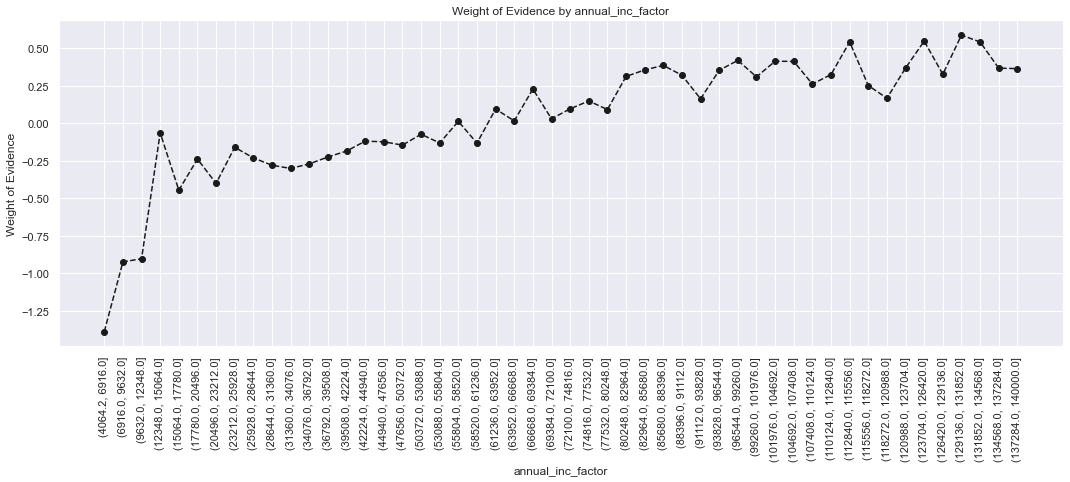

In [260]:
plot_by_woe(df_temp, 90)

In [261]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [262]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_10948/1373989647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.149, 2.98]",872,0.856651,0.020240,747.0,125.0,0.019442,0.026818,-0.321623,NaN,NaN,inf
1,"(2.98, 5.96]",1537,0.886142,0.035676,1362.0,175.0,0.035449,0.037546,-0.057451,0.029490,0.264172,inf
2,"(5.96, 8.94]",2502,0.887690,0.058075,2221.0,281.0,0.057807,0.060287,-0.042016,0.001548,0.015435,inf
3,"(8.94, 11.92]",2476,0.887318,0.057472,2197.0,279.0,0.057182,0.059858,-0.045738,0.000372,0.003722,inf
4,"(11.92, 14.9]",2506,0.887071,0.058168,2223.0,283.0,0.057859,0.060717,-0.048208,0.000247,0.002470,inf
5,"(14.9, 17.88]",2339,0.890979,0.054292,2084.0,255.0,0.054241,0.054709,-0.008593,0.003908,0.039615,inf
6,"(17.88, 20.86]",2250,0.899556,0.052226,2024.0,226.0,0.052680,0.048487,0.082922,0.008577,0.091515,inf
7,"(20.86, 23.84]",2036,0.888998,0.047259,1810.0,226.0,0.047110,0.048487,-0.028827,0.010558,0.111749,inf
8,"(23.84, 26.82]",1992,0.899096,0.046237,1791.0,201.0,0.046615,0.043124,0.077850,0.010098,0.106677,inf
9,"(26.82, 29.8]",2065,0.892010,0.047932,1842.0,223.0,0.047943,0.047844,0.002061,0.007087,0.075789,inf


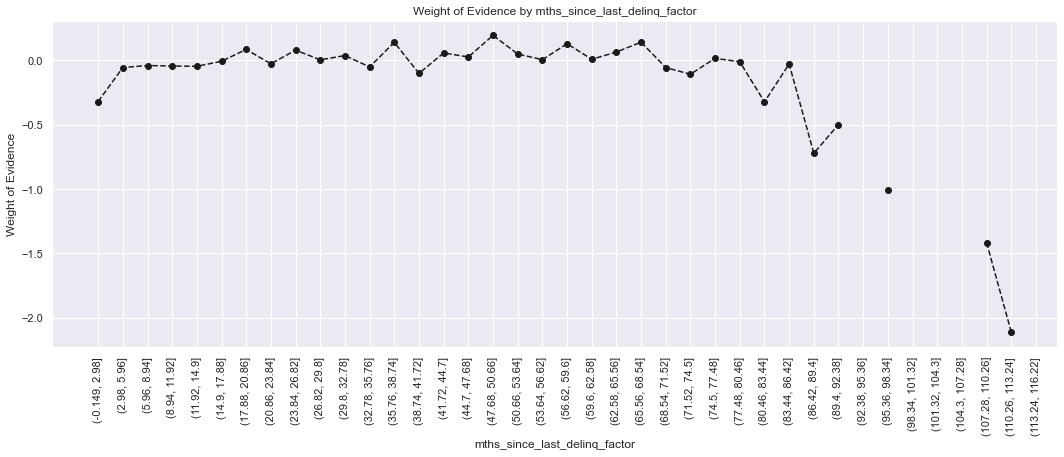

In [263]:
plot_by_woe(df_temp, 90)

In [264]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [266]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

In [267]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",375,0.888000,0.004021,333.0,42.0,0.004008,0.004130,-0.029973,NaN,NaN,0.030874
1,"(0.8, 1.6]",483,0.902692,0.005179,436.0,47.0,0.005248,0.004621,0.127049,0.014692,0.157022,0.030874
2,"(1.6, 2.399]",647,0.933539,0.006938,604.0,43.0,0.007269,0.004228,0.541928,0.030848,0.414879,0.030874
3,"(2.399, 3.199]",822,0.903893,0.008814,743.0,79.0,0.008942,0.007768,0.140802,0.029646,0.401126,0.030874
4,"(3.199, 3.999]",1022,0.909002,0.010959,929.0,93.0,0.011181,0.009145,0.201063,0.005109,0.060261,0.030874
5,"(3.999, 4.799]",1232,0.904221,0.013211,1114.0,118.0,0.013408,0.011603,0.144582,0.004781,0.056481,0.030874
6,"(4.799, 5.599]",1460,0.911644,0.015656,1331.0,129.0,0.016019,0.012684,0.233427,0.007423,0.088846,0.030874
7,"(5.599, 6.398]",1692,0.910757,0.018143,1541.0,151.0,0.018547,0.014848,0.222461,0.000887,0.010966,0.030874
8,"(6.398, 7.198]",1882,0.914984,0.020181,1722.0,160.0,0.020725,0.015733,0.275622,0.004228,0.053161,0.030874
9,"(7.198, 7.998]",2247,0.914108,0.024095,2054.0,193.0,0.024721,0.018977,0.264408,0.000876,0.011214,0.030874


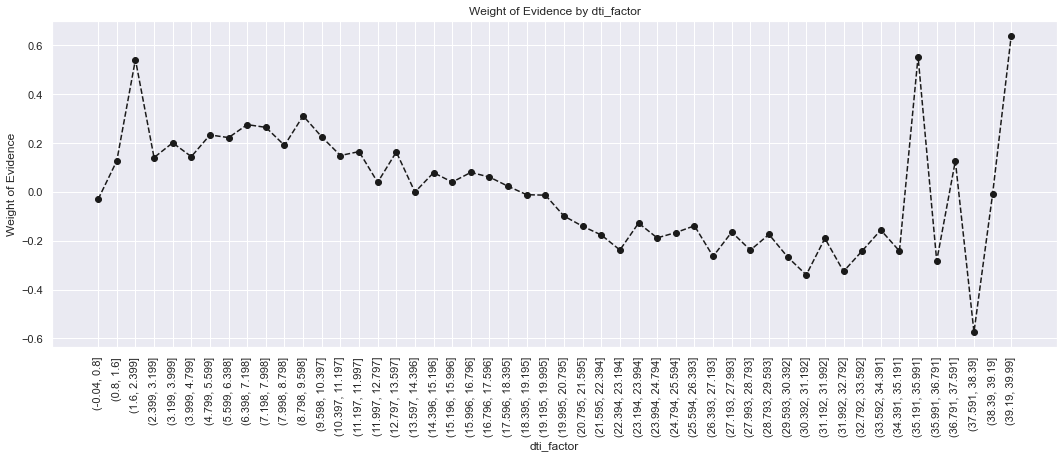

In [268]:
plot_by_woe(df_temp, 90)

In [269]:
# Categories:
df_inputs_prepr['dti:<=1.4']     = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5']   = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7']   = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5']  = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35']   = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35']       = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [271]:
df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 50)

In [272]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_last_record_factor', df_targets_prepr)
df_temp

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",259,0.760618,0.020659,197.0,62.0,0.017527,0.047803,-1.003356,NaN,NaN,0.124829
1,"(2.42, 4.84]",15,0.800000,0.001196,12.0,3.0,0.001068,0.002313,-0.773131,0.039382,0.230225,0.124829
2,"(4.84, 7.26]",39,0.820513,0.003111,32.0,7.0,0.002847,0.005397,-0.639599,0.020513,0.133531,0.124829
3,"(7.26, 9.68]",34,0.823529,0.002712,28.0,6.0,0.002491,0.004626,-0.618980,0.003017,0.020619,0.124829
4,"(9.68, 12.1]",79,0.873418,0.006301,69.0,10.0,0.006139,0.007710,-0.227904,0.049888,0.391076,0.124829
5,"(12.1, 14.52]",47,0.851064,0.003749,40.0,7.0,0.003559,0.005397,-0.416456,0.022354,0.188552,0.124829
6,"(14.52, 16.94]",50,0.980000,0.003988,49.0,1.0,0.004359,0.000771,1.732395,0.128936,2.148851,0.124829
7,"(16.94, 19.36]",89,0.910112,0.007099,81.0,8.0,0.007206,0.006168,0.155583,0.069888,1.576813,0.124829
8,"(19.36, 21.78]",67,0.880597,0.005344,59.0,8.0,0.005249,0.006168,-0.161329,0.029515,0.316912,0.124829
9,"(21.78, 24.2]",116,0.913793,0.009253,106.0,10.0,0.009431,0.007710,0.201429,0.033196,0.362758,0.124829


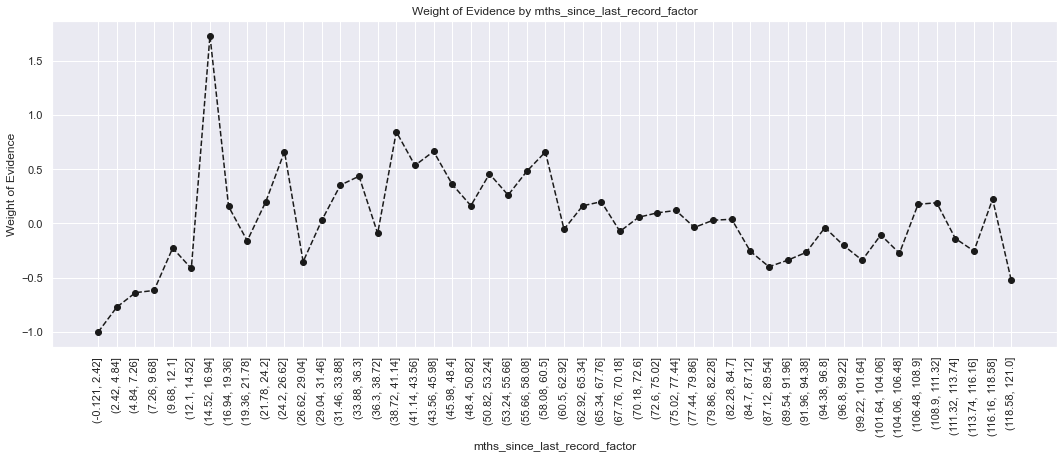

In [273]:
plot_by_woe(df_temp, 90)

In [274]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the test dataset

In [162]:
#loan_data_inputs_train = df_inputs_prepr

In [275]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [279]:
loan_data_inputs_train.shape

(373028, 328)

In [276]:
loan_data_targets_train.shape

(373028,)

In [277]:
loan_data_inputs_test.shape

(93257, 328)

In [278]:
loan_data_targets_test.shape

(93257,)

In [281]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')